N/LAB Platinum Deposit Customer Prediction Model

Step 1 Data Colliation and Cleaning

Part 1: Basic Dataset Inspection Goal: Load and inspect the dataset to understand its structure, identify missing values, and check for class imbalance in the target variable

In [14]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load the dataset
file_path = r"/content/cwk_data_20703562.csv" #Place your data file path
data = pd.read_csv(file_path)

# Dataset Overview
print("Dataset Info:")
data.info()

# Basic Data Inspection
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Variables:")
print(data.describe())

# Check Missing Values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values Percentage:")
print(missing_percentage[missing_percentage > 0])

# Frequency Distributions for Categorical Variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nFrequency Distributions for Categorical Variables:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts().head(5))  # Display top 5 values for readability

# Class Imbalance in Target Variable
print("\nClass Imbalance in Target Variable 'y':")
print(data['y'].value_counts(normalize=True))  # Display proportions for clarity


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memory usage: 500.1+ KB

First 5 Rows of the Dataset:
   age         job   marital  education default  balance housing loan  \
0   30  technician   m

Part 2: Removing Missing Values

In [15]:
# Step 2: Clean the Dataset
# Drop unnecessary columns
if 'poutcome' in data.columns:
    data.drop(['poutcome'], axis=1, inplace=True)
    print("\nDropped column 'poutcome' due to high unknown values.")

# Replace 'unknown' in categorical columns
columns_to_replace = ['job', 'education']
for col in columns_to_replace:
    if col in data.columns:
        unknown_count = (data[col] == 'unknown').sum()
        data[col] = data[col].replace(['unknown'], 'other')
        print(f"Replaced 'unknown' with 'other' in column '{col}': {unknown_count} values replaced.")

# Handle missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns with >50% missing values: {list(columns_to_drop)}")
data.dropna(subset=['y'], inplace=True)

#Used the help of Chatgpt


Dropped column 'poutcome' due to high unknown values.
Replaced 'unknown' with 'other' in column 'job': 29 values replaced.
Replaced 'unknown' with 'other' in column 'education': 163 values replaced.
Dropped columns with >50% missing values: []


Part 3: Handling Outliers

In [16]:
# Remove outliers using z-score
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if col != 'y':  # Skip target variable
        initial_rows = len(data)
        data[f'{col}_zscore'] = zscore(data[col])
        data = data[(data[f'{col}_zscore'] > -3) & (data[f'{col}_zscore'] < 3)]
        data.drop(columns=[f'{col}_zscore'], inplace=True)
        print(f"Removed outliers in '{col}' using z-score: {initial_rows - len(data)} rows removed.")
#Used the help of Chatgpt

Removed outliers in 'age' using z-score: 41 rows removed.
Removed outliers in 'balance' using z-score: 78 rows removed.
Removed outliers in 'day' using z-score: 0 rows removed.
Removed outliers in 'duration' using z-score: 87 rows removed.
Removed outliers in 'campaign' using z-score: 67 rows removed.
Removed outliers in 'pdays' using z-score: 88 rows removed.
Removed outliers in 'previous' using z-score: 89 rows removed.


<ipython-input-16-5b3c0d6bceb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[f'{col}_zscore'], inplace=True)
<ipython-input-16-5b3c0d6bceb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_zscore'] = zscore(data[col])


Part 5: Final Dataset Structure

Converting Target variable 'y' to binary

In [17]:
if 'y' in data.columns:
    data['y'] = data['y'].map({'yes': 1, 'no': 0})
    print("\nConverted 'y' to binary (1 for 'yes', 0 for 'no').")



Converted 'y' to binary (1 for 'yes', 0 for 'no').


In [18]:
# Step 3: Normalize Numerical Features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nDataset After Scaling Numerical Features:")
print(data.describe().loc[['mean', 'std']])  # Verify scaling


Dataset After Scaling Numerical Features:
               age       balance           day      duration      campaign  \
mean -2.882202e-16 -6.254778e-18 -1.030787e-16 -7.005351e-17 -1.801376e-17   
std   1.000141e+00  1.000141e+00  1.000141e+00  1.000141e+00  1.000141e+00   

             pdays      previous         y  
mean  5.654319e-17 -4.803669e-17  0.183099  
std   1.000141e+00  1.000141e+00  0.386802  


In [20]:
# Step 4: Fix and Transform 'pdays'
if 'pdays' in data.columns:
    # Create a binary indicator for 'pdays'
    data['previous_contact'] = data['pdays'].apply(lambda x: 1 if x != -1 else 0)
    print("\nTransformed 'pdays' to 'previous_contact' indicator.")



Transformed 'pdays' to 'previous_contact' indicator.


Summary of removed variables

In [21]:
# Record original dataset dimensions
original_row_count = len(data)
original_column_count = data.shape[1]

# Display final dataset structure
print("\nDataset After Preprocessing:")
print(data.info())

# Summary of Removed Features
print("\nSummary of Removed Features During Cleaning:")
print(f"Number of Rows Dropped: {original_row_count - len(data)}")
print(f"Number of Columns Dropped: {original_column_count - len(data.columns)}")

print("\nFinal Number of Features:", data.shape[1])
#Used the help of Chatgpt


Dataset After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 3550 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3550 non-null   float64
 1   job               3550 non-null   object 
 2   marital           3550 non-null   object 
 3   education         3550 non-null   object 
 4   default           3550 non-null   object 
 5   balance           3550 non-null   float64
 6   housing           3550 non-null   object 
 7   loan              3550 non-null   object 
 8   contact           3550 non-null   object 
 9   day               3550 non-null   float64
 10  duration          3550 non-null   float64
 11  campaign          3550 non-null   float64
 12  pdays             3550 non-null   float64
 13  previous          3550 non-null   float64
 14  y                 3550 non-null   int64  
 15  previous_contact  3550 non-null   int64  
dtypes: float64(7), in

Exploatory data Analysis

Step 1: Analyze the Target Variable

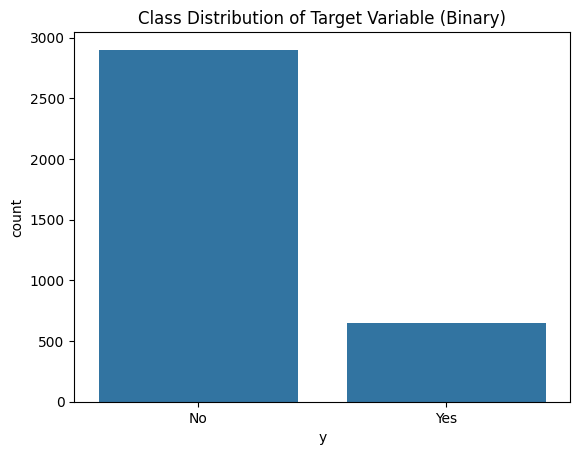

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution of the target variable
sns.countplot(data=data, x='y')
plt.title("Class Distribution of Target Variable (Binary)")
plt.xticks([0, 1], ['No', 'Yes'])  # Replace numeric labels with original categories for clarity
plt.show()
#Used the help of Chatgpt

Step 2: Analyze Numerical Features

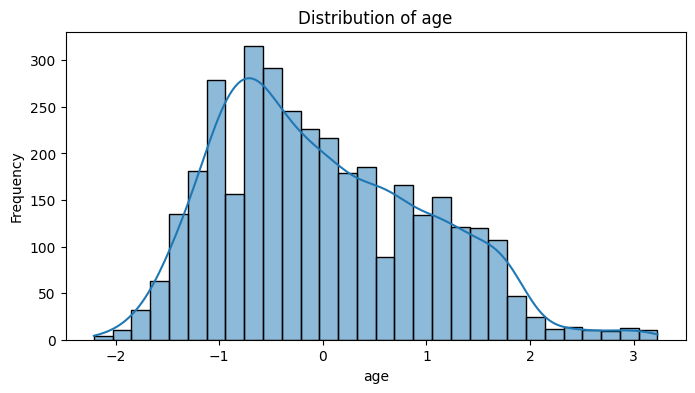

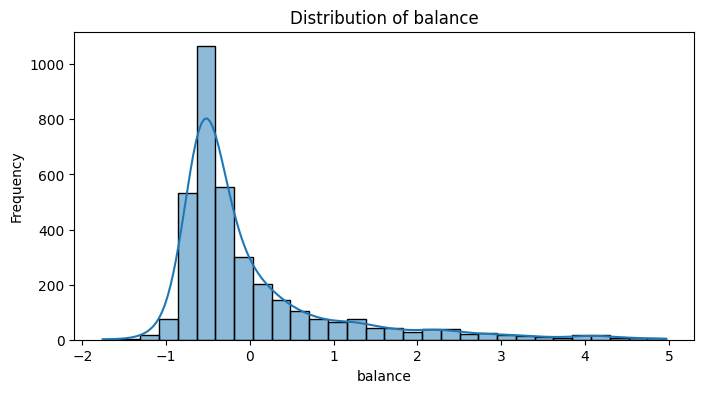

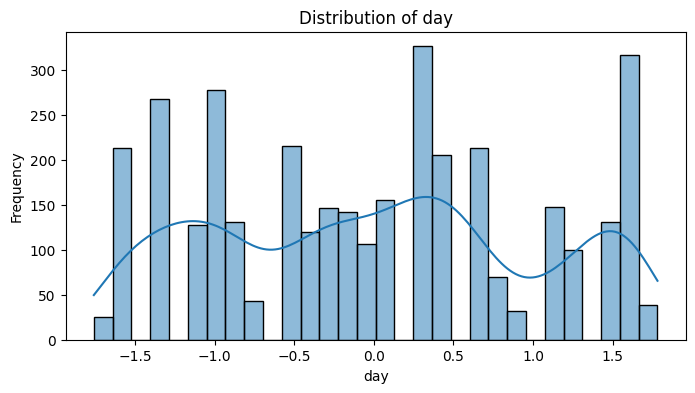

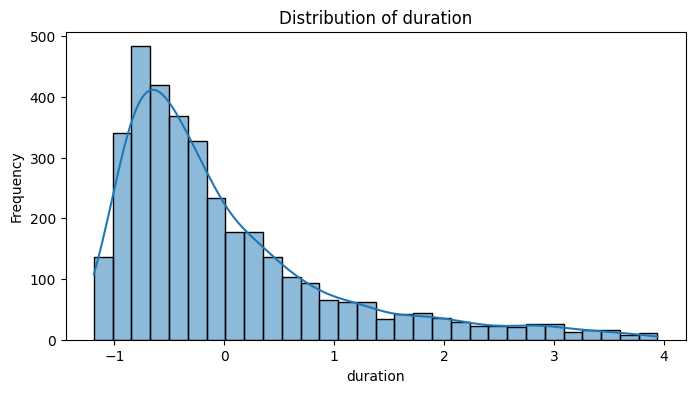

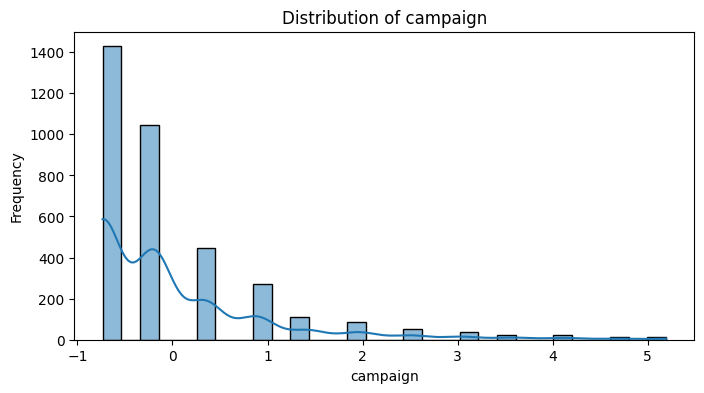

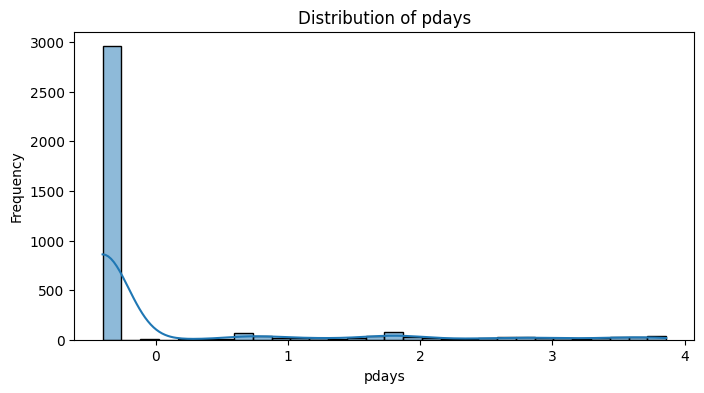

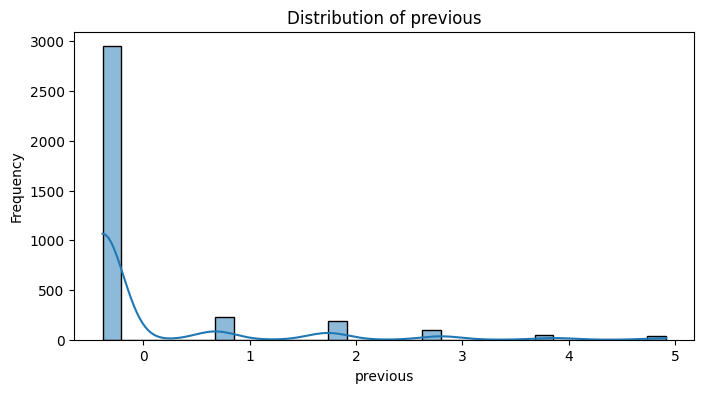

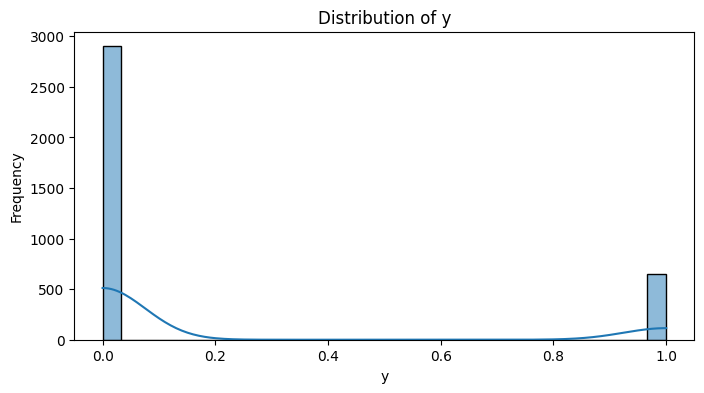

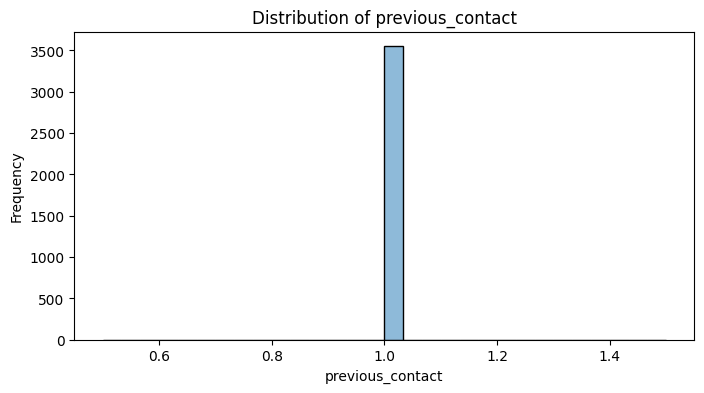

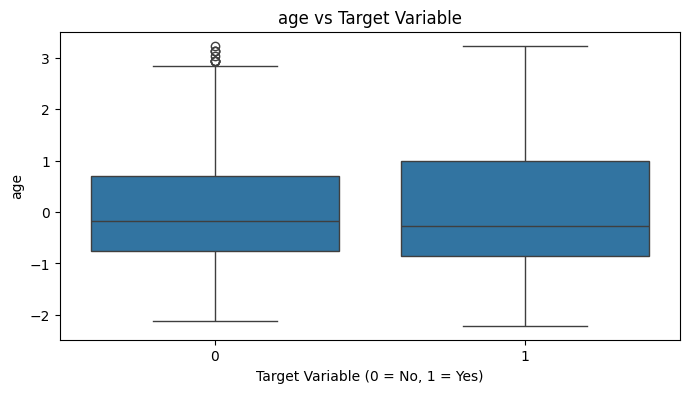

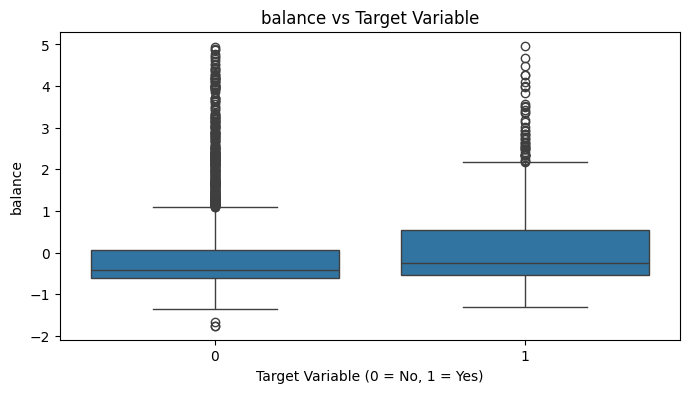

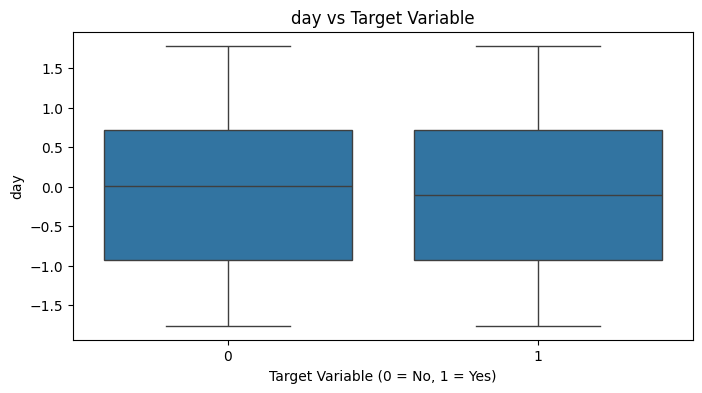

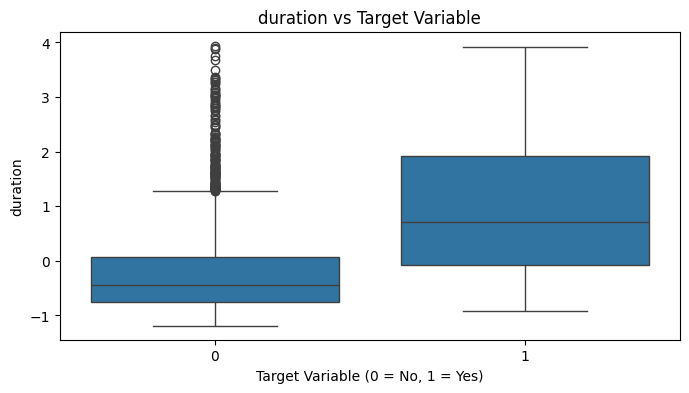

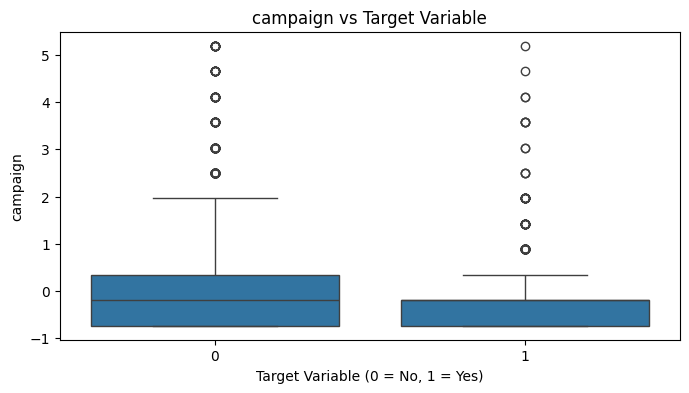

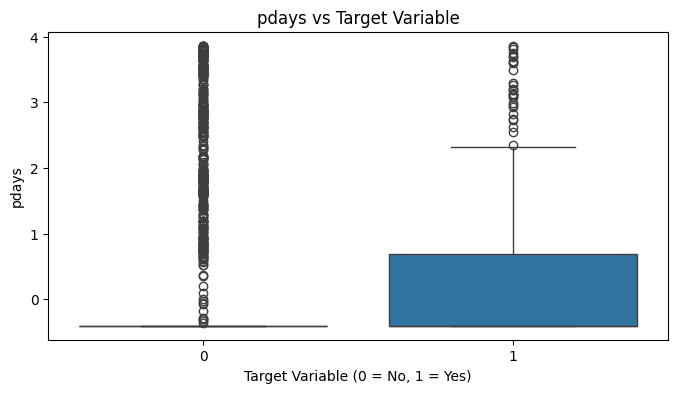

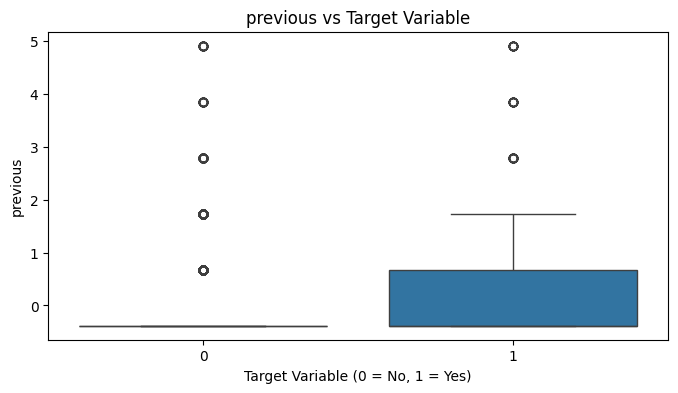

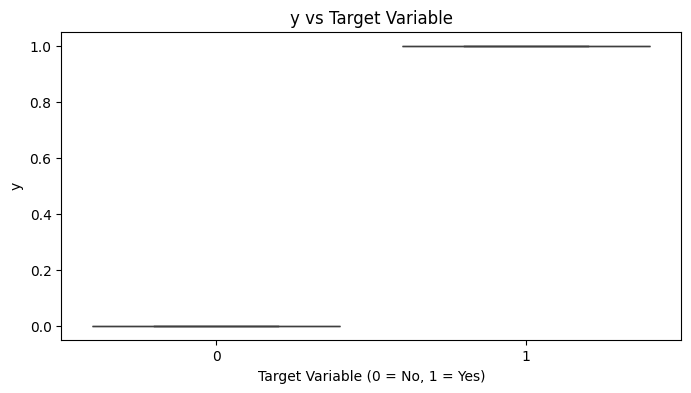

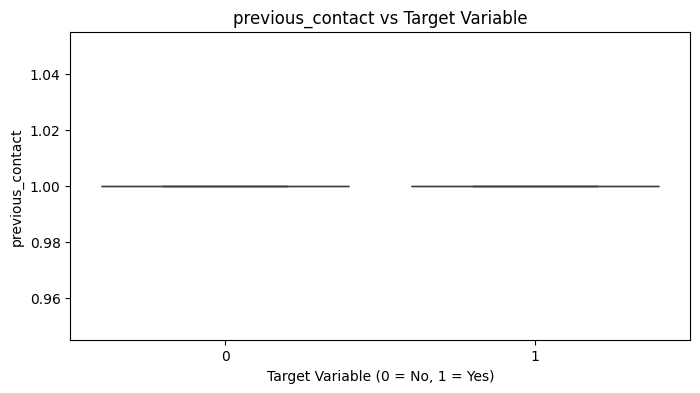

In [23]:
# Distribution of numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Relationship with the target variable
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='y', y=col)
    plt.title(f"{col} vs Target Variable")
    plt.xlabel("Target Variable (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()


Step 4: Analyze Categorical Features

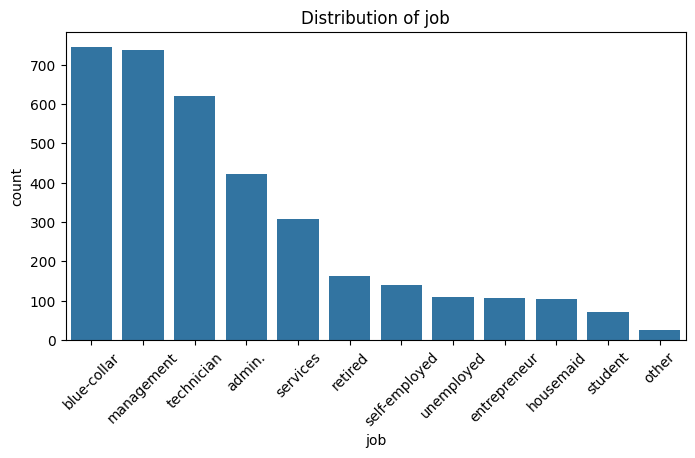

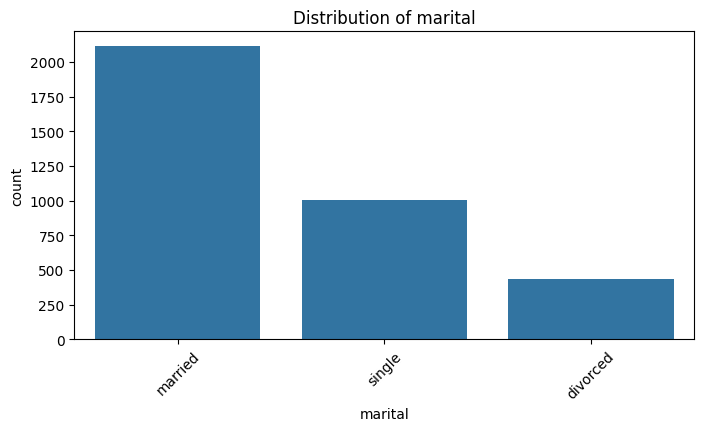

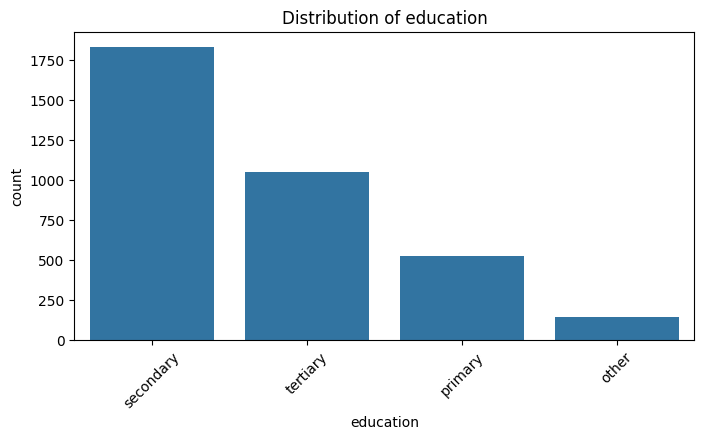

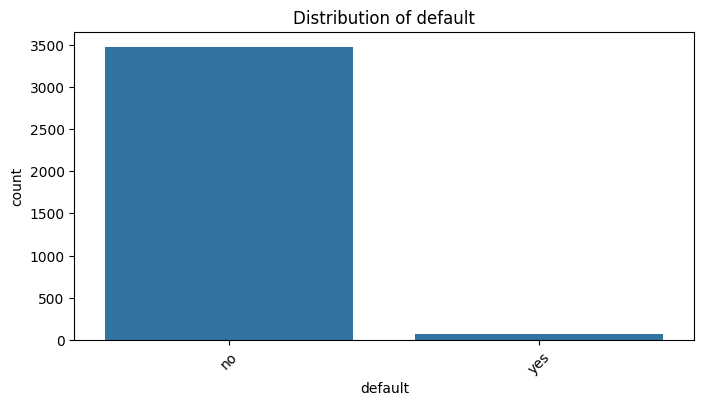

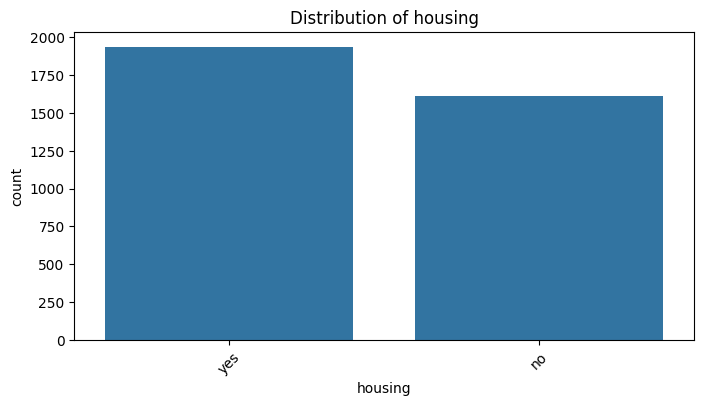

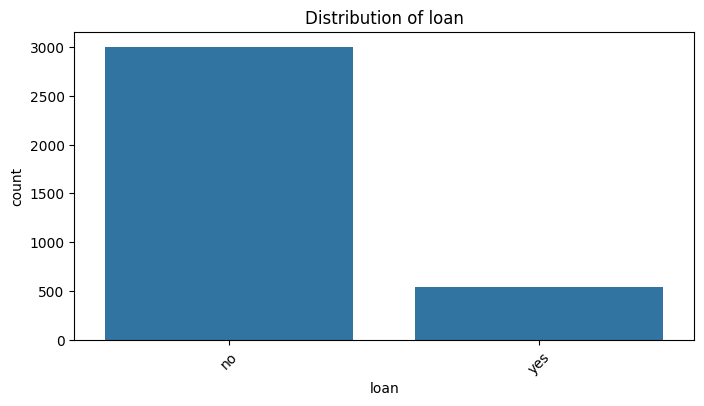

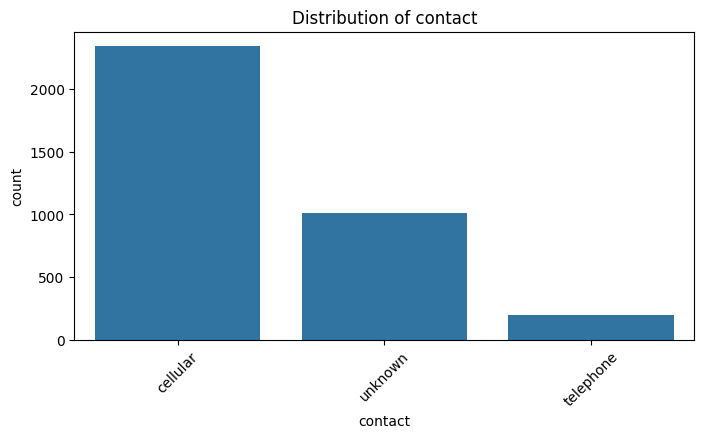

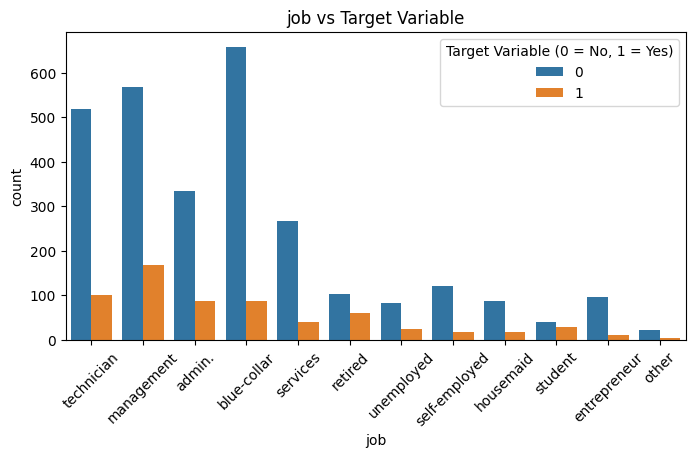

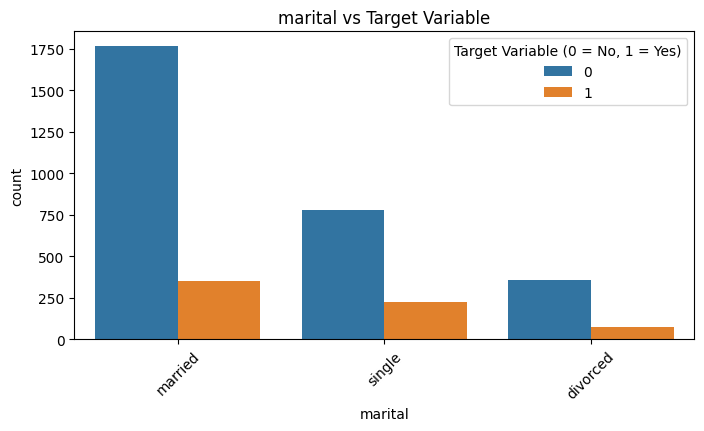

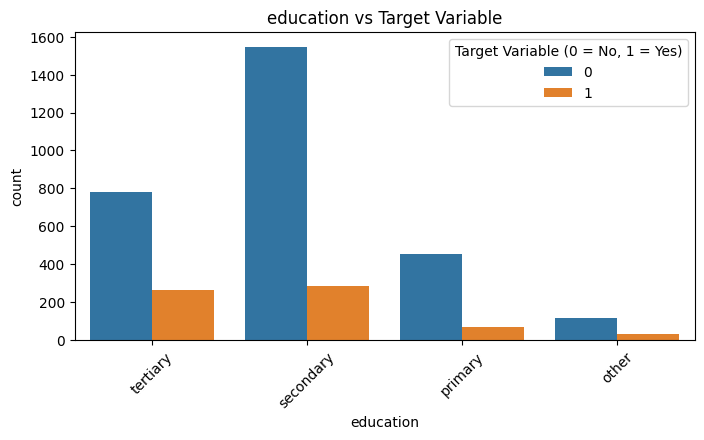

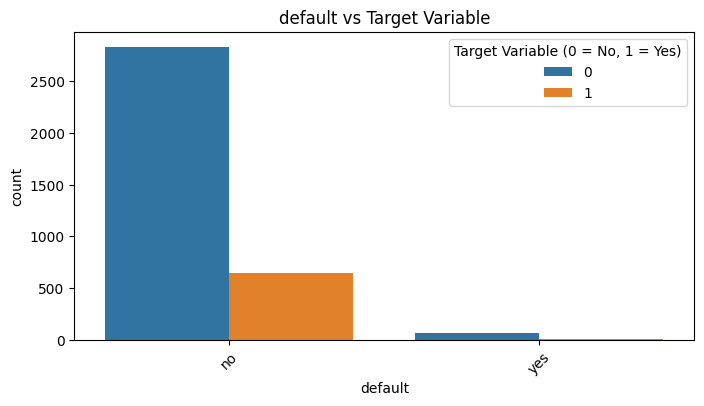

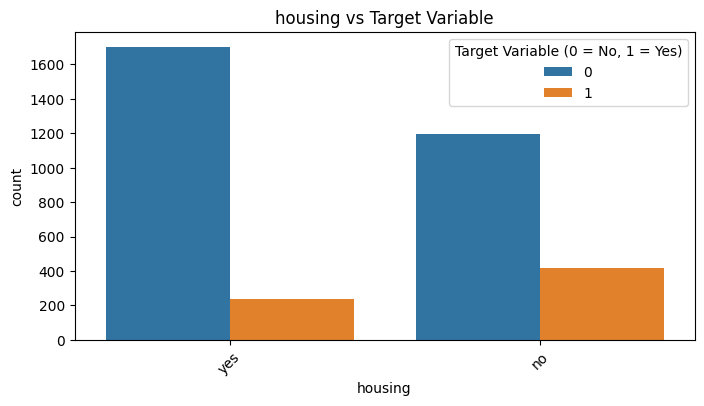

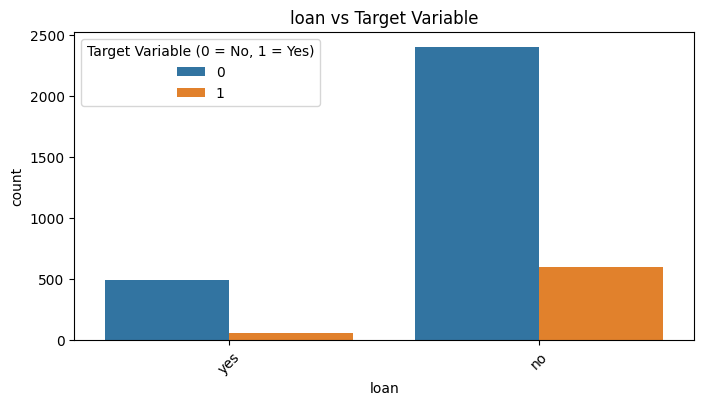

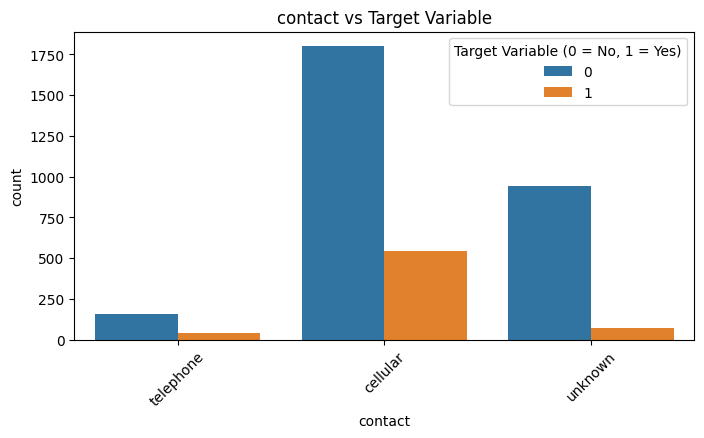

In [24]:
# Distribution of categorical features
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Relationship with the target variable
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='y')
    plt.title(f"{col} vs Target Variable")
    plt.xticks(rotation=45)
    plt.legend(title="Target Variable (0 = No, 1 = Yes)")
    plt.show()

Step 5: Check Correlations

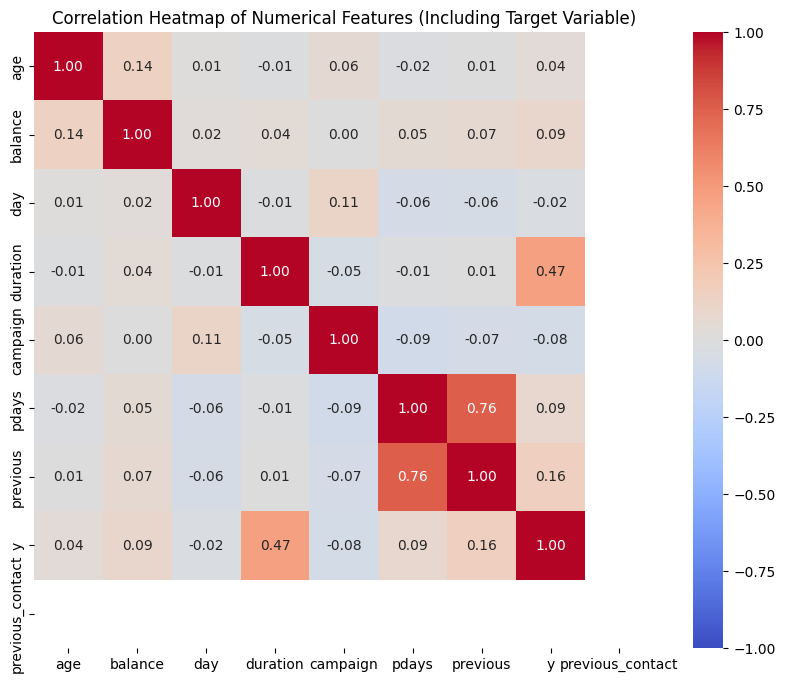

In [25]:
# Correlation heatmap for numerical features (including 'y')
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features (Including Target Variable)")
plt.show()


data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '>70'])
age_group_subscription = data.groupby('age_group')['y'].mean()
age_group_subscription.plot(kind='bar', color='coral')
plt.title('Subscription Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.show()

<ipython-input-26-cd04150a1f47>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='housing', y='y', ci=None)


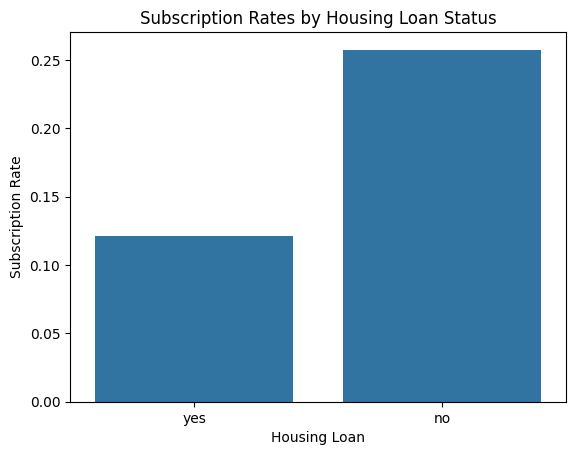

In [26]:
sns.barplot(data=data, x='housing', y='y', ci=None)
plt.title('Subscription Rates by Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Subscription Rate')
plt.show()

<ipython-input-27-e5613c4aa0a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='y', y='duration', palette='Set3')


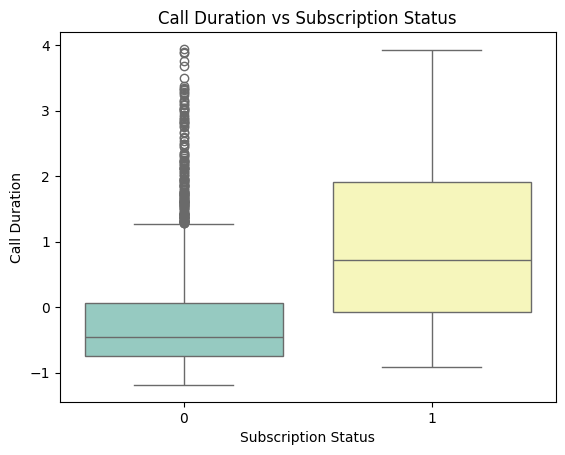

In [27]:
sns.boxplot(data=data, x='y', y='duration', palette='Set3')
plt.title('Call Duration vs Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Call Duration')
plt.show()

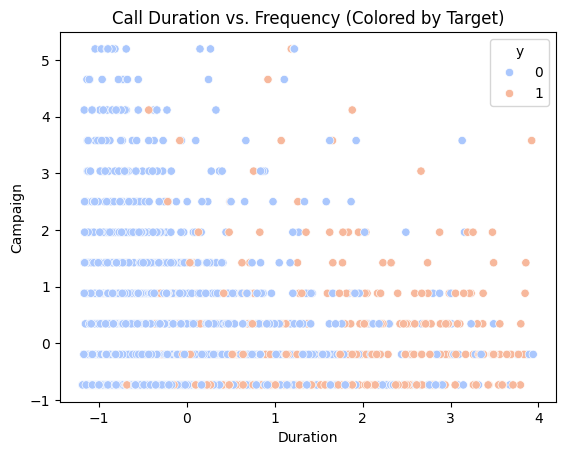

In [28]:
sns.scatterplot(data=data, x='duration', y='campaign', hue='y', palette='coolwarm')
plt.title('Call Duration vs. Frequency (Colored by Target)')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

In [30]:
# Reverse scaling (if mean and std are known)
mean_age = 40 # Example: Replace with actual mean used for scaling
std_age = 15 # Example: Replace with actual standard deviation used for scaling
# Reverse the scaling
data['original_age'] = data['age'] * std_age + mean_age
# Create age groups based on the original age
data['age_group'] = pd.cut(data['original_age'], bins=[0, 30, 60, 100], labels=['young', 'middle-aged', 'senior'])
print("\nCorrected Age Group Distribution (from original age):")
print(data['age_group'].value_counts())
#Used the help of Chatgpt


Corrected Age Group Distribution (from original age):
age_group
middle-aged    2100
young          1026
senior          424
Name: count, dtype: int64


In [31]:
# Create balance categories using scaled thresholds
data['balance_category'] = pd.cut(data['balance'],
bins=[-float('inf'), -0.5, 0.5, 1.5, float('inf')],
labels=['negative', 'low', 'medium', 'high'])
print("\nBalance Category Distribution (scaled thresholds):")
print(data['balance_category'].value_counts())
#Used the help of Chatgpt


Balance Category Distribution (scaled thresholds):
balance_category
low         1569
negative    1333
medium       334
high         314
Name: count, dtype: int64


In [32]:
# Create interaction features
data['balance_duration_ratio'] = data['balance'] / (data['duration'] + 1) # Avoid division by zero
data['call_efficiency'] = data['duration'] / (data['campaign'] + 1)
print("\nSample Interaction Features:")
print(data[['balance_duration_ratio', 'call_efficiency']].head())
#Used the help of Chatgpt


Sample Interaction Features:
   balance_duration_ratio  call_efficiency
0               -1.695834        -0.124495
1               -0.354420         0.857860
3                6.576021        -2.447750
4               -3.064611        -0.182458
5               -0.137784         1.934538


In [33]:
print("\nSummary Statistics for 'previous':")
print(data['previous'].describe())
print("\nSummary Statistics for 'campaign':")
print(data['campaign'].describe())
print("\nUnique Values in 'previous':")
print(data['previous'].unique())
print("\nUnique Values in 'campaign':")
print(data['campaign'].unique())



Summary Statistics for 'previous':
count    3.550000e+03
mean    -4.803669e-17
std      1.000141e+00
min     -3.837886e-01
25%     -3.837886e-01
50%     -3.837886e-01
75%     -3.837886e-01
max      4.917572e+00
Name: previous, dtype: float64

Summary Statistics for 'campaign':
count    3.550000e+03
mean    -1.801376e-17
std      1.000141e+00
min     -7.350714e-01
25%     -7.350714e-01
50%     -1.960292e-01
75%      3.430131e-01
max      5.194393e+00
Name: campaign, dtype: float64

Unique Values in 'previous':
[-0.38378862  0.67648344  1.73675549  2.79702754  4.91757165  3.8572996 ]

Unique Values in 'campaign':
[ 3.03822416 -0.19602916 -0.73507138  0.88205528  0.34301306  1.4210975
  2.49918194  1.96013972  4.65535082  3.57726638  4.1163086   5.19439305]


In [34]:
# Drop the 'previous' column as it has no variability
data = data.drop(columns=['previous'])
print("\n'Dropped previous column as it has no variability.")



'Dropped previous column as it has no variability.


In [35]:
# Create balance categories using scaled thresholds
data['balance_category'] = pd.cut(data['balance'],
bins=[-float('inf'), -0.5, 0.5, 1.5, float('inf')],
labels=['negative', 'low', 'medium', 'high'])
print("\nBalance Category Distribution (scaled thresholds):")
print(data['balance_category'].value_counts())
#Used the help of Chatgpt


Balance Category Distribution (scaled thresholds):
balance_category
low         1569
negative    1333
medium       334
high         314
Name: count, dtype: int64


In [36]:
# One-hot encoding for categorical variables
categorical_columns = ['job', 'marital', 'education']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print("\nDataset After One-Hot Encoding:")
print(data.head())



Dataset After One-Hot Encoding:
        age default   balance housing loan    contact       day  duration  \
0 -1.043827      no -0.843275     yes  yes  telephone  1.662855 -0.502737   
1 -0.655299      no -0.598862      no   no   cellular -1.404015  0.689695   
3 -1.335222      no  2.311610     yes   no   cellular -0.342406 -0.648479   
4  0.218889      no -0.806584      no   no   cellular  1.426942 -0.736807   
5  0.704549      no -0.352081     yes   no    unknown  0.365333  1.555312   

   campaign     pdays  ...  job_self-employed  job_services  job_student  \
0  3.038224 -0.403061  ...              False         False        False   
1 -0.196029 -0.403061  ...              False         False        False   
3 -0.735071 -0.403061  ...              False         False        False   
4  3.038224 -0.403061  ...              False         False        False   
5 -0.196029 -0.403061  ...              False         False        False   

  job_technician job_unemployed  marital_marrie

In [37]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\nNumeric Columns for Correlation Analysis:")
print(numeric_columns)


Numeric Columns for Correlation Analysis:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'y',
       'previous_contact', 'original_age', 'balance_duration_ratio',
       'call_efficiency'],
      dtype='object')


In [38]:
# Select only numeric columns for variance threshold
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data[numeric_columns]
print("\nColumns Used for Low-Variance Selection:")
print(data_numeric.columns)
#Used the help of Chatgpt


Columns Used for Low-Variance Selection:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'y',
       'previous_contact', 'original_age', 'balance_duration_ratio',
       'call_efficiency'],
      dtype='object')


In [39]:
# Compute correlation matrix
correlation_matrix = data[numeric_columns].corr()
# Select features with correlation > 0.1
target_corr = correlation_matrix['y'].abs().sort_values(ascending=False)
important_features = target_corr[target_corr > 0.1].index
data = data[important_features]
print("\nSelected Features Based on Correlation with Target:")
print(important_features)
#Used the help of Chatgpt


Selected Features Based on Correlation with Target:
Index(['y', 'duration', 'call_efficiency'], dtype='object')


Using SMOTE to fix the imbalance in class

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Separate features and target
X = data.drop(columns=['y'])
y = data['y']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nClass Distribution After Applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
#Used the help of Chatgpt


Class Distribution After Applying SMOTE:
y
1    2042
0    2042
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Model evaluation
Dummy classifier

In [41]:
from sklearn import dummy
from sklearn.model_selection import train_test_split
# Step 1: Separate features (X) and target (Y)
X = data.drop(columns=['y']) # Input features
Y = data['y'] # Target variable
# Step 2: Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Step 3: Create a Dummy Classifier as the baseline
dc = dummy.DummyClassifier(strategy="most_frequent") # Predicts the majority class
# Step 4: Train the Dummy Classifier on the training data
dc.fit(X_train, Y_train)
# Step 5: Evaluate the Dummy Classifier on the testing data
score = dc.score(X_test, Y_test)
# Step 6: Print the baseline performance
print("Baseline Accuracy (Dummy Classifier):", score)

Baseline Accuracy (Dummy Classifier): 0.8056338028169014


In [42]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn import dummy
# Step 1: Setup the folds
folds = KFold(n_splits=5, shuffle=True, random_state=42)
# Step 2: Create a Dummy Classifier
dc = dummy.DummyClassifier(strategy="most_frequent") # Strategy to always predict the majority class
# Step 3: Perform Cross-Validation
dc_scores = cross_val_score(dc, X, Y, scoring='accuracy', cv=folds)
# Step 4: Print Results
print("Baseline Accuracy (Cross-Validation):", np.mean(dc_scores))
print("Number of Observations in Dataset:", len(Y))


Baseline Accuracy (Cross-Validation): 0.8169014084507042
Number of Observations in Dataset: 3550


In [43]:
# Example of a confusion matrix for Dummy Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
# Step 1: Generate predictions using cross-validation
dc_pred = cross_val_predict(dc, X, Y, cv=folds)
# Step 2: Compute the confusion matrix
dc_matrix = confusion_matrix(Y, dc_pred)
# Step 3: Print the confusion matrix
print("\nPredicted Labels:")
print(dc_pred)
print("\nConfusion Matrix:")
print(dc_matrix)


Predicted Labels:
[0 0 0 ... 0 0 0]

Confusion Matrix:
[[2900    0]
 [ 650    0]]


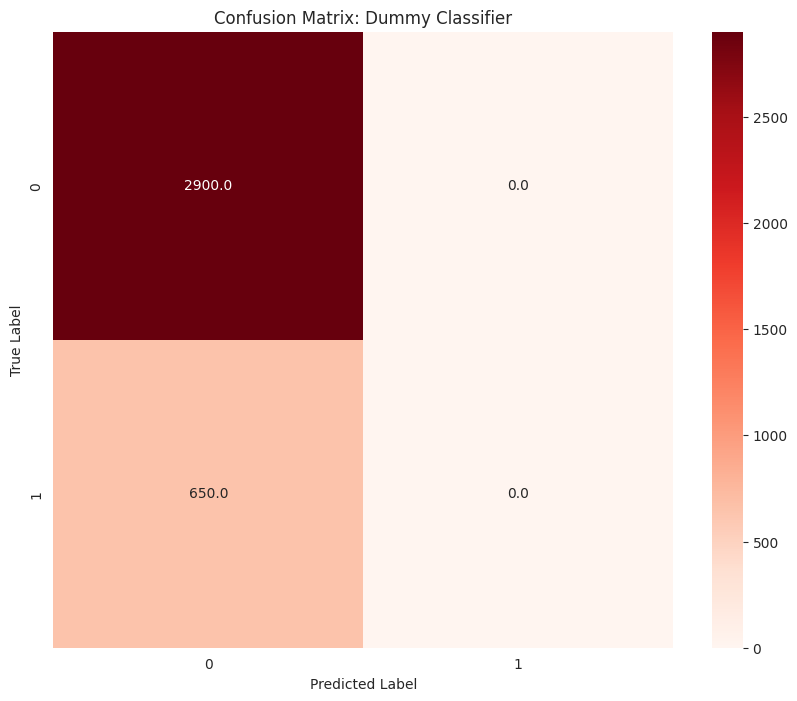

In [44]:
#-- display the confusion matrices as heatmaps
sns.set_style("white") # Set a clean white background for the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Set the figure size
# Plot the confusion matrix as a heatmap
sns.heatmap(dc_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)
# Add titles and axis labels
plt.title("Confusion Matrix: Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# Show the heatmap
plt.show()

1.Logistic Regression

Logistic Regression Results:
Cross-Validation Accuracy: 0.8461
Test Accuracy: 0.8352
Precision: 0.6909
Recall: 0.2754
F1-Score: 0.3938
Confusion Matrix:
[[555  17]
 [100  38]]


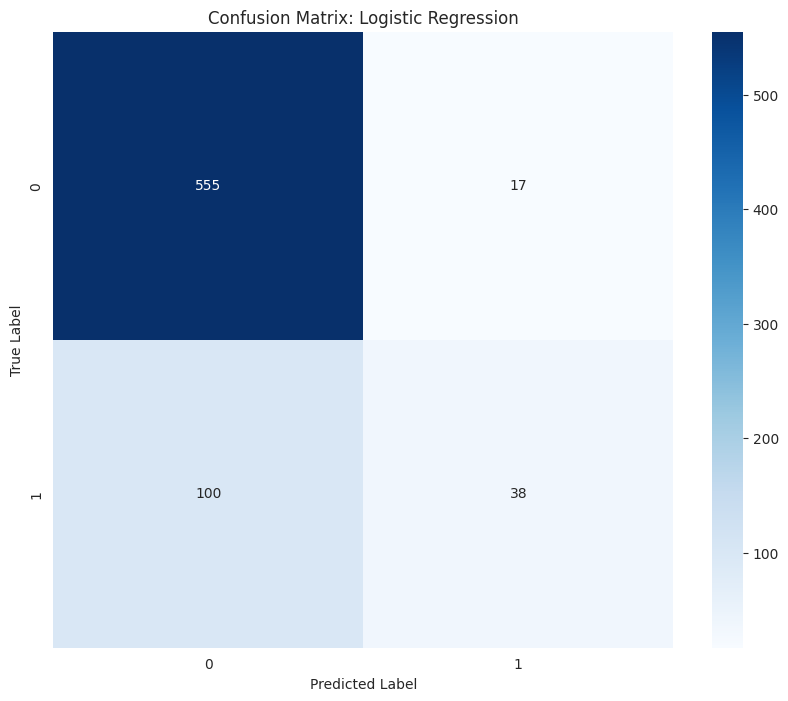

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Logistic Regression with parameterization
logistic_model = LogisticRegression(
    random_state=42,
    max_iter=1000,         # Maximum number of iterations
    solver='liblinear',    # Solver to use for optimization
    C=1.0,                 # Inverse of regularization strength (larger values mean weaker regularization)
    penalty='l2'           # L2 regularization (Ridge)
)

# Step 3: Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train, Y_train, cv=5, scoring='accuracy')

# Step 4: Train the model on the training set
logistic_model.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Step 6: Compute performance metrics
accuracy = accuracy_score(Y_test, logistic_predictions)
precision = precision_score(Y_test, logistic_predictions)
recall = recall_score(Y_test, logistic_predictions)
f1 = f1_score(Y_test, logistic_predictions)
conf_matrix = confusion_matrix(Y_test, logistic_predictions)

# Step 7: Display results
print("Logistic Regression Results:")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Step 8: Display the confusion matrix as a heatmap
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)  # Plot the heatmap

# Step 9: Add titles and axis labels
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Step 10: Show the heatmap
plt.show()
#Used the help of Chatgpt

2.Decision Tree

Decision Tree Results:
Cross-Validation Accuracy: 0.8426
Test Accuracy: 0.8282
Precision: 0.6250
Recall: 0.2899
F1-Score: 0.3960
Confusion Matrix:
[[548  24]
 [ 98  40]]


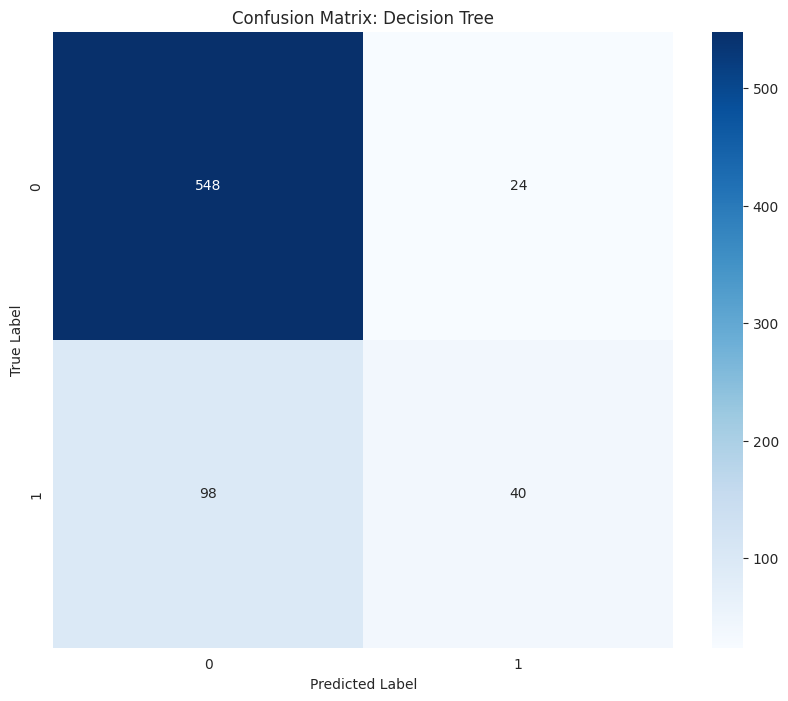

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Decision Tree with parameterization
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # Criterion for split ('gini' or 'entropy')
    max_depth=5,          # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    random_state=42       # Ensure reproducibility
)

# Step 3: Perform cross-validation
cv_scores = cross_val_score(dt_model, X_train, Y_train, cv=5, scoring='accuracy')

# Step 4: Train the model on the training set
dt_model.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Step 6: Compute performance metrics
accuracy = accuracy_score(Y_test, dt_predictions)
precision = precision_score(Y_test, dt_predictions)
recall = recall_score(Y_test, dt_predictions)
f1 = f1_score(Y_test, dt_predictions)
conf_matrix = confusion_matrix(Y_test, dt_predictions)

# Step 7: Display results
print("Decision Tree Results:")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Step 8: Display the confusion matrix as a heatmap
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)  # Plot the heatmap

# Step 9: Add titles and axis labels
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Step 10: Show the heatmap
plt.show()
#Used the help of Chatgpt

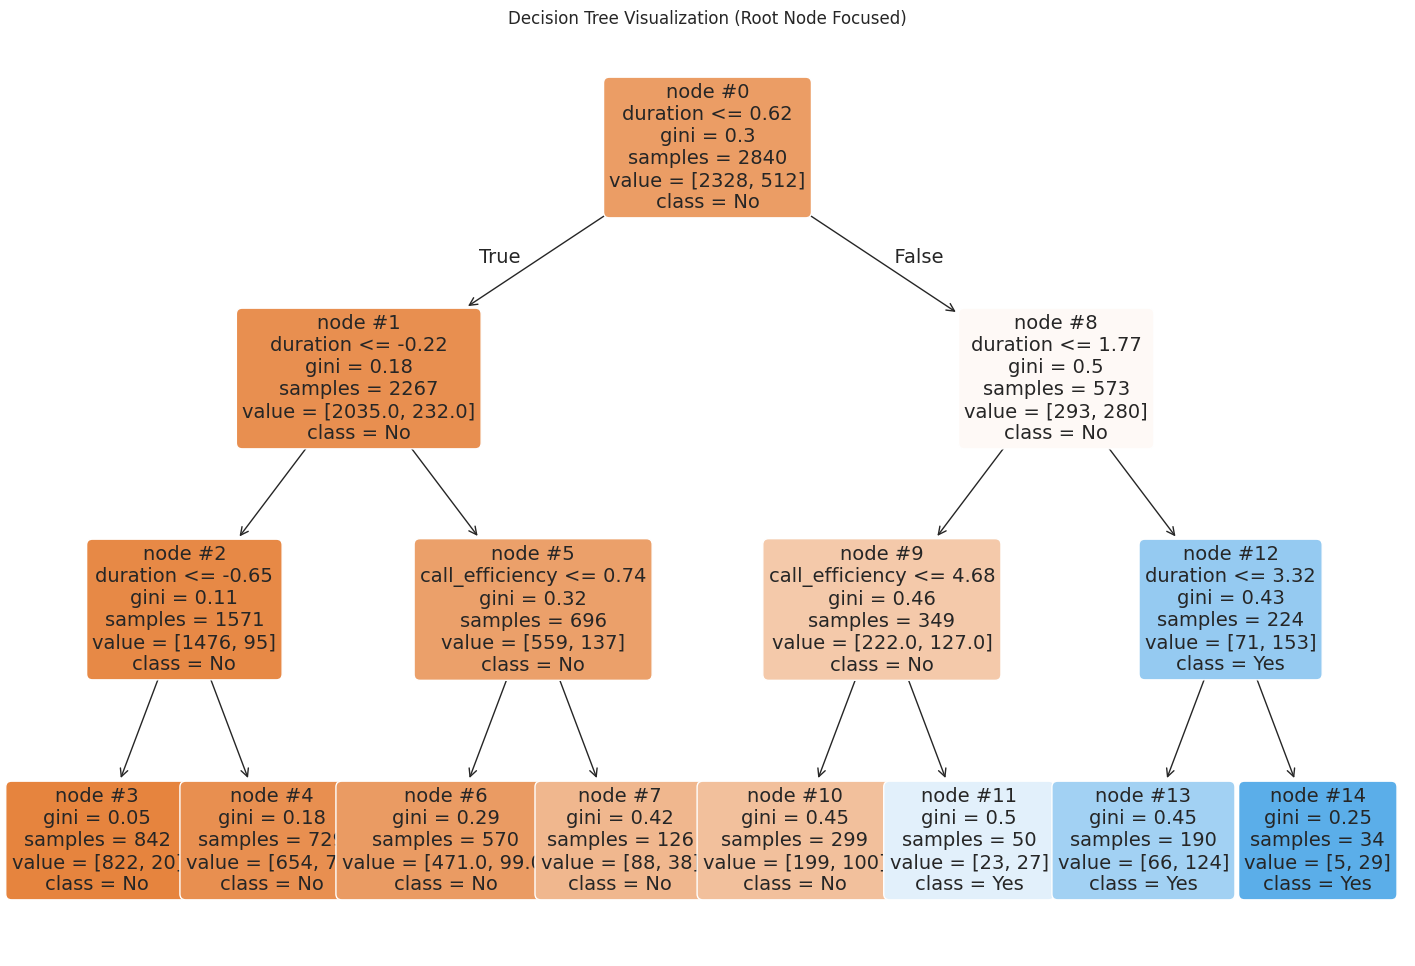

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Decision Tree model with parameter adjustments for better visualization
dt_model = DecisionTreeClassifier(
    criterion='gini',          # Gini impurity for splitting
    max_depth=3,               # Limiting depth to avoid too much complexity
    min_samples_split=10,      # Minimum samples required to split an internal node
    min_samples_leaf=5,        # Minimum samples required to be at a leaf node
    random_state=42,           # Ensures reproducibility
    max_features=None          # Use all features for splitting
)

# Step 3: Train the model
dt_model.fit(X_train, Y_train)

# Step 4: Visualize the trained decision tree with better readability for the root node
plt.figure(figsize=(18, 12))  # Larger figure for better clarity
plot_tree(dt_model,
          filled=True,
          feature_names=X.columns,   # Feature names in the dataset
          class_names=['No', 'Yes'],  # The classes (your target values)
          rounded=True,                # Makes the tree more readable
          fontsize=14,                 # Larger font size for better clarity
          proportion=False,            # Set to False to make node sizes uniform
          precision=2,                 # Limit decimal places for clarity
          node_ids=True)               # Add node IDs to trace splits

# Step 5: Display the tree plot
plt.title("Decision Tree Visualization (Root Node Focused)")
plt.show()
#Used the help of Chatgpt

3.Random Forest

The top model that is the best suited for predection

Random Forest Results:
Cross-Validation Accuracy: 0.8254
Test Accuracy: 0.8141
Precision: 0.5441
Recall: 0.2681
F1-Score: 0.3592
Confusion Matrix:
[[541  31]
 [101  37]]


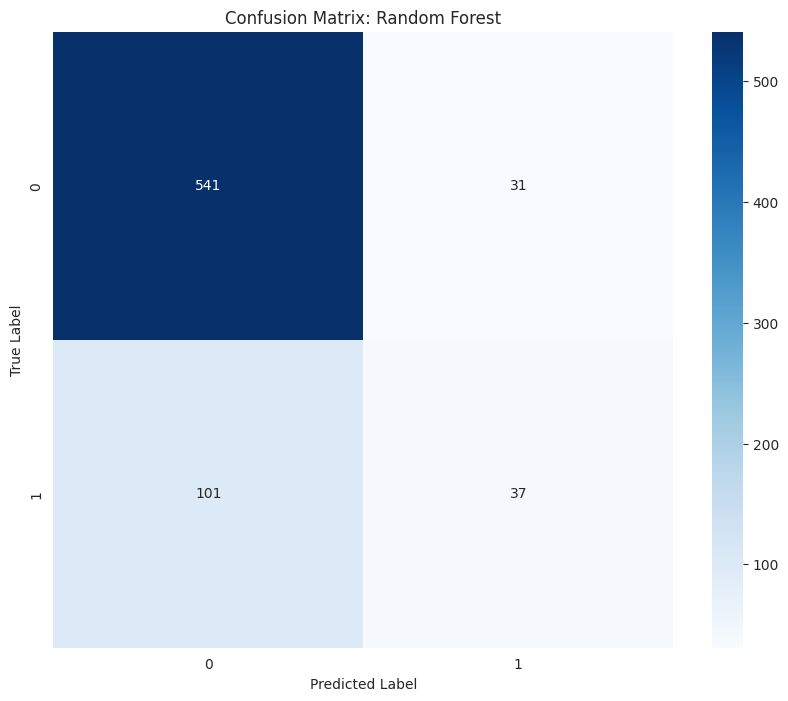

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Random Forest with parameterization
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees in the forest
    max_depth=10,        # Maximum depth of each tree
    min_samples_split=2, # Minimum samples required to split an internal node
    min_samples_leaf=1,  # Minimum samples required to be at a leaf node
    random_state=42,     # Ensure reproducibility
    n_jobs=-1            # Use all processors for parallel computation
)

# Step 3: Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='accuracy')

# Step 4: Train the model on the training set
rf_model.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Step 6: Compute performance metrics
accuracy = accuracy_score(Y_test, rf_predictions)
precision = precision_score(Y_test, rf_predictions)
recall = recall_score(Y_test, rf_predictions)
f1 = f1_score(Y_test, rf_predictions)
conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Step 7: Display results
print("Random Forest Results:")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Step 8: Display the confusion matrix as a heatmap
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)  # Plot the heatmap

# Step 9: Add titles and axis labels
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Step 10: Show the heatmap
plt.show()
#Used the help of Chatgpt